In [ ]:
# By Eng.Dana Al-Mahrouk

# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


In [5]:
# 1. Basic Data Exploration
num_rows, num_columns = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()


print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)


Data Types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object

Missing Values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [8]:
basic_stats = df['TotalPayBenefits'].describe()
salary_range = df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min()
standard_deviation = df['TotalPayBenefits'].std()

print("\nDescriptive Statistics for Salary:")
print(basic_stats)
print("\nSalary Range:", salary_range)
print("Standard Deviation of Salary:", standard_deviation)



Descriptive Statistics for Salary:
count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

Salary Range: 568213.56
Standard Deviation of Salary: 62793.533483237705


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [9]:
# 3. Data Cleaning
# Assuming you choose to fill missing values with the mean total pay benefits
df['TotalPayBenefits'].fillna(df['TotalPayBenefits'].mean(), inplace=True)


4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

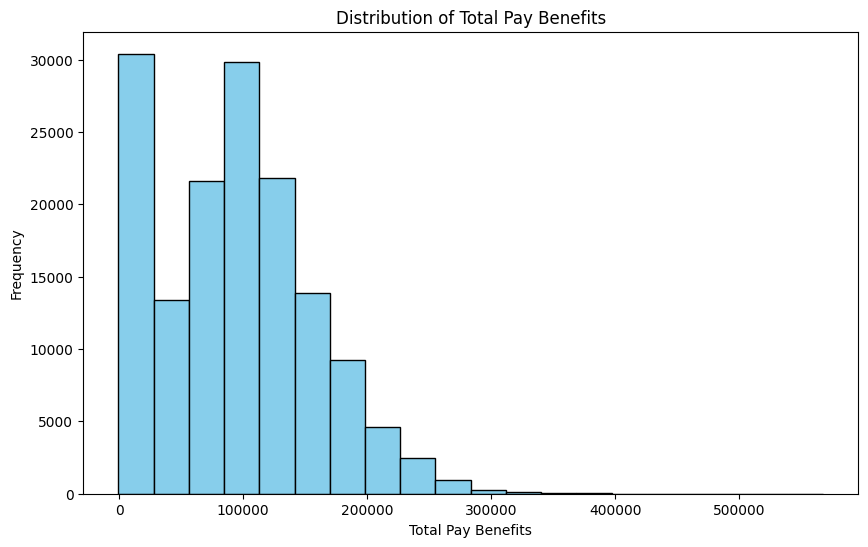

In [11]:
# 4. Basic Data Visualization
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPayBenefits'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Pay Benefits')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Print unique JobTitles without repeating
unique_job_titles = df['JobTitle'].unique()
print(unique_job_titles)

'''
for job_title in unique_job_titles:
    print(job_title)
'''

'''
department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()
'''

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']


"\ndepartment_counts = df['JobTitle'].value_counts()\nplt.figure(figsize=(8, 8))\nplt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)\nplt.title('Proportion of Employees in Different Departments')\nplt.show()\n"

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [17]:
# Group by JobTitle and calculate average TotalPayBenefits
grouped_data = df.groupby('JobTitle')['TotalPayBenefits'].mean()
print(grouped_data)

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       80266.370000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             69521.123200
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                60118.550000
ZOO CURATOR                                       66686.560000
Name: TotalPayBenefits, Length: 2159, dtype: float64


6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


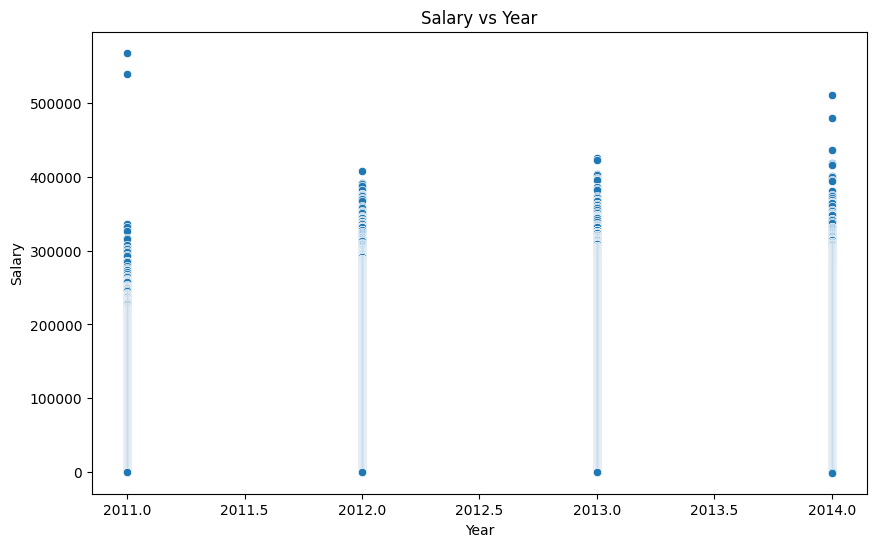

Correlation between Salary and Year: 0.15194732496121088


In [22]:
# Assuming 'Year' is a numerical column
correlation_year_salary = df['TotalPayBenefits'].corr(df['Year'])

# Scatter plot for Salary vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='TotalPayBenefits', data=df)
plt.title('Salary vs Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

print("Correlation between Salary and Year:", correlation_year_salary)
